# Práctica 2

## Laboratorio 2: Sistemas Multi-Qubits

### 1. Implementa el siguiente circuito cuántico con Qiskit y simúlalo. Recuerda que, por defecto, el estado inicial es |000> ¿cuál es el estado final? (mide los 3 qubits). El objetivo es averiguar qué hace el circuito cuántico.

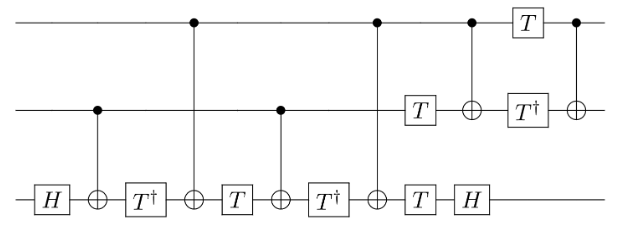

- Cumple con los siguientes puntos:
- ##### Cambia el estado inicial (aplicando compuertas $X$ en cada qubit, y la combinación de estas) para cubrir todas las posibilidades del lado izquiero de la tabla de verdad ($q2,q1,q0$), es decir, los $2^3=8$ posibles estados iniciales.
        - Recuerda que $q0$ es el qubit de hasta arriba en el circuito (orden de Qiskit).

👉 Estado inicial:


<IPython.core.display.Latex object>

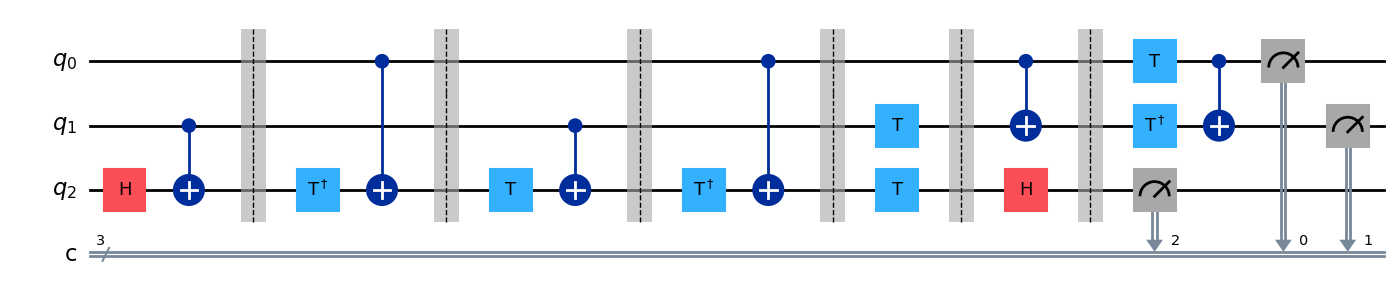

👉 Estado final después de aplicar las compuertas:


<IPython.core.display.Latex object>

👉 Estado inicial:


<IPython.core.display.Latex object>

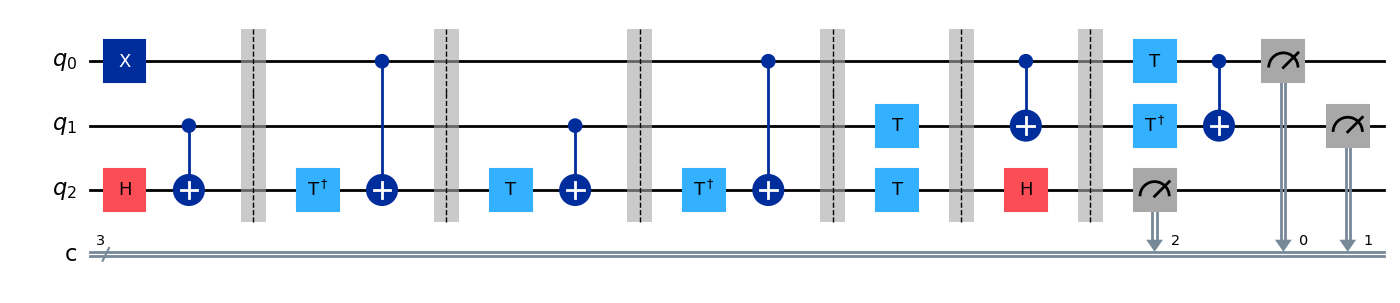

👉 Estado final después de aplicar las compuertas:


<IPython.core.display.Latex object>

👉 Estado inicial:


<IPython.core.display.Latex object>

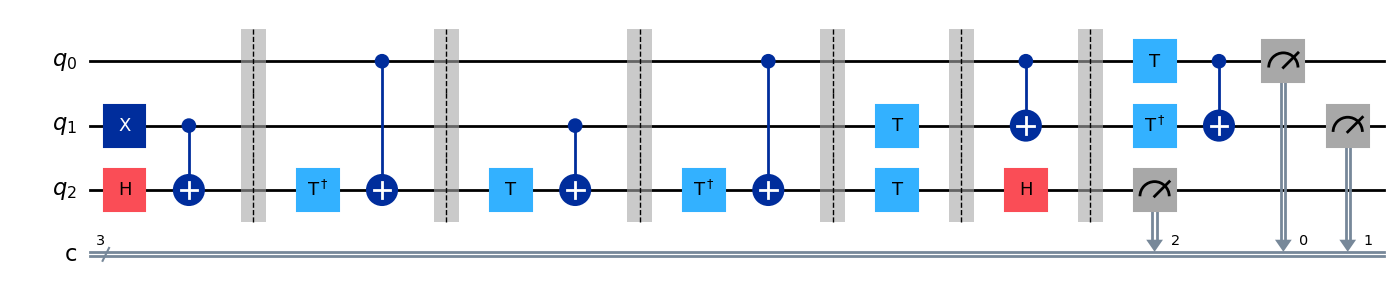

👉 Estado final después de aplicar las compuertas:


<IPython.core.display.Latex object>

👉 Estado inicial:


<IPython.core.display.Latex object>

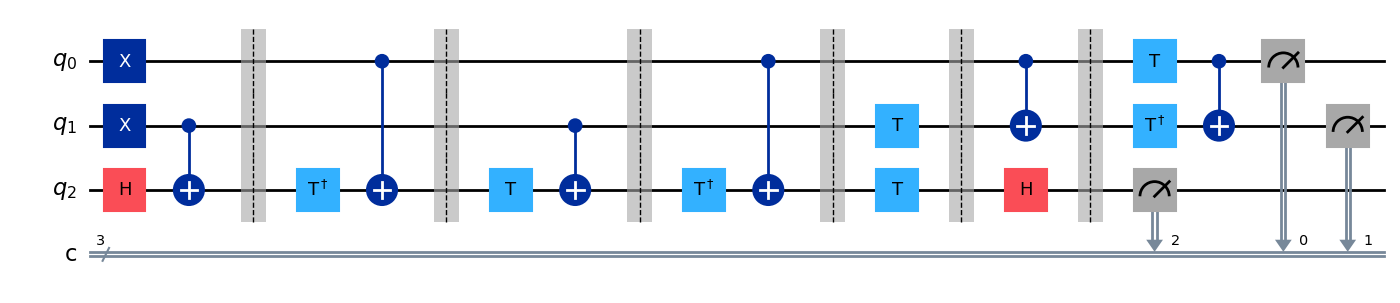

👉 Estado final después de aplicar las compuertas:


<IPython.core.display.Latex object>

👉 Estado inicial:


<IPython.core.display.Latex object>

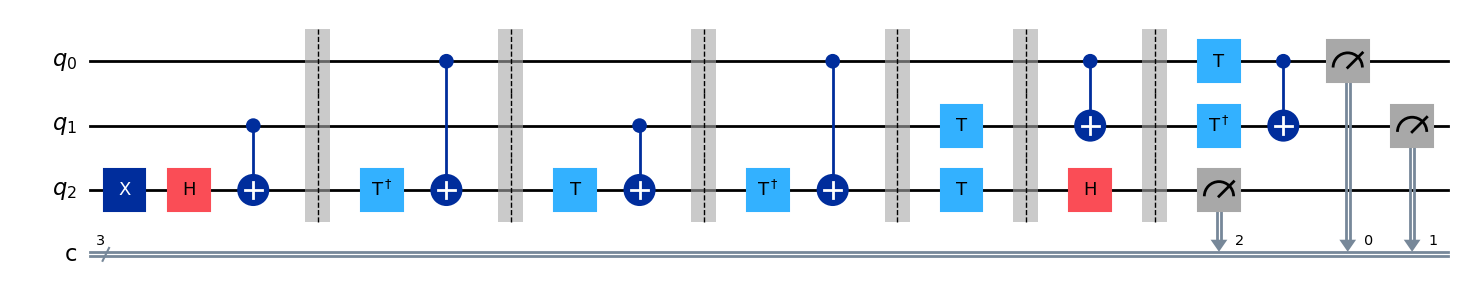

👉 Estado final después de aplicar las compuertas:


<IPython.core.display.Latex object>

👉 Estado inicial:


<IPython.core.display.Latex object>

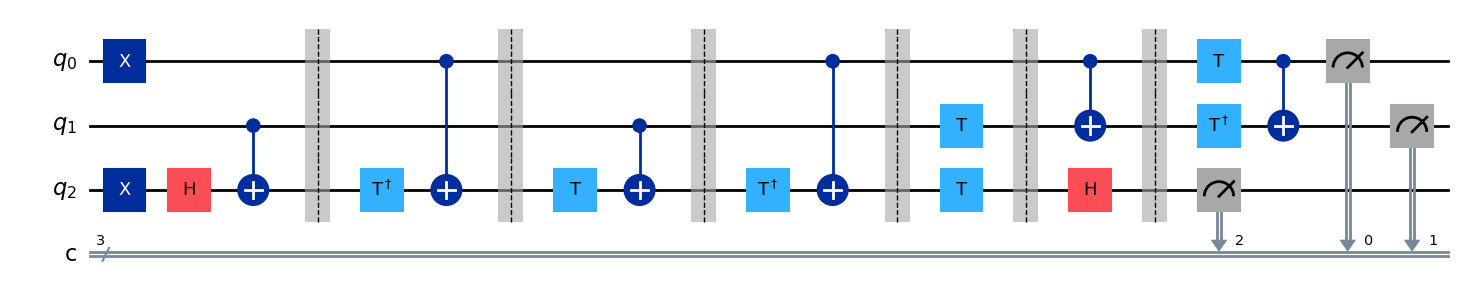

👉 Estado final después de aplicar las compuertas:


<IPython.core.display.Latex object>

👉 Estado inicial:


<IPython.core.display.Latex object>

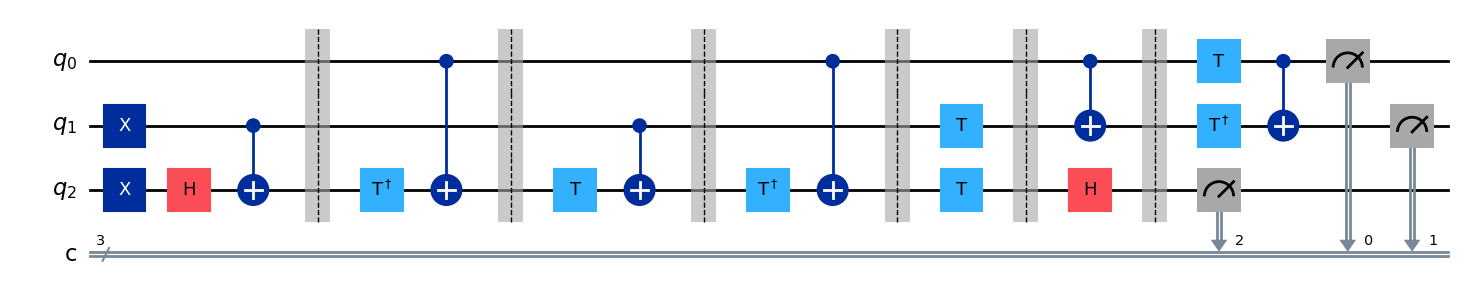

👉 Estado final después de aplicar las compuertas:


<IPython.core.display.Latex object>

👉 Estado inicial:


<IPython.core.display.Latex object>

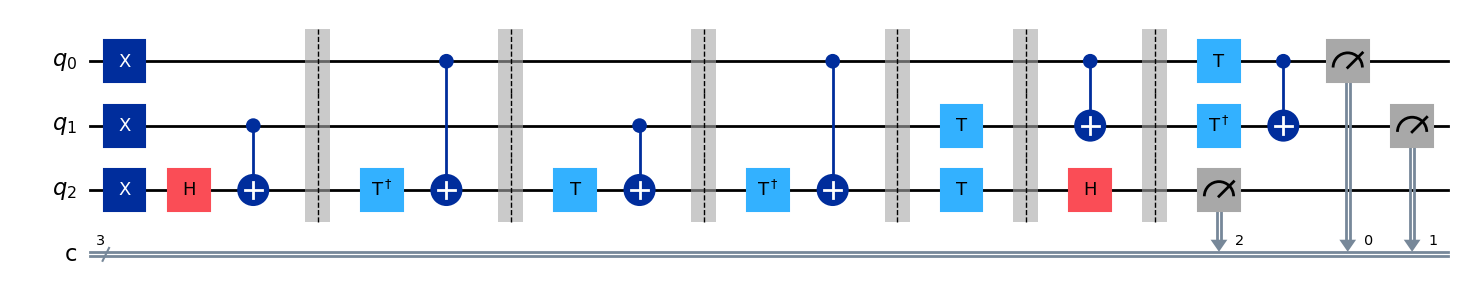

👉 Estado final después de aplicar las compuertas:


<IPython.core.display.Latex object>

In [180]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Operator

def compuertas(QuantumCircuit):
    psi = Statevector(QuantumCircuit)
        
    print("👉 Estado inicial:")
    display(psi.draw('latex'))
    print()
    
    circuit = QuantumCircuit
    circuit.h(2)    # Hadamard en q0
    circuit.cx(1,2) #Cnot a q2 y q1
    circuit.barrier()
    circuit.tdg(2)  # T-daga en q2
    circuit.cx(0,2) #Cnot a q2 y q0
    circuit.barrier()
    circuit.t(2)    # T en q2
    circuit.cx(1,2) #Cnot a q2 y q1
    circuit.barrier()
    circuit.tdg(2)  # T en q2
    circuit.cx(0,2) #Cnot a q2 y q0
    circuit.barrier()
    circuit.t(2)    # T en q2
    circuit.t(1)    # T en q1
    circuit.barrier()
    circuit.h(2)    # H en q2
    circuit.cx(0,1) #Cnot a q1 y q0
    circuit.barrier()
    circuit.tdg(1)  # T en q1
    circuit.t(0)    # T en q0
    circuit.cx(0,1) #Cnot a q1 y q0
    psif = Statevector(circuit)
    circuit.measure([0,1,2], [0,1,2])  # medir los 3 qubits en los 3 bits clásicos
    
    display(circuit.draw('mpl'))
    #op = Operator(circuit)

    print("👉 Estado final después de aplicar las compuertas:")
    display(psif.draw('latex'))
    return circuit

circuit0 = QuantumCircuit(3,3) # estado |000>
compuertas(circuit0)
circuit1 = QuantumCircuit(3,3) # estado |001>
circuit1.x(0)    # q0 = |1>
compuertas(circuit1)
circuit2 = QuantumCircuit(3,3) # estado |010>
circuit2.x(1)    # q1 = |1>
compuertas(circuit2)
circuit3 = QuantumCircuit(3,3) # estado |011>
circuit3.x(0)    # q0 = |1>
circuit3.x(1)    # q1 = |1>
compuertas(circuit3)
circuit4 = QuantumCircuit(3,3) # estado |100>
circuit4.x(2)    # q2 = |1>
compuertas(circuit4)
circuit5 = QuantumCircuit(3,3) # estado |101>
circuit5.x(0)    # q0 = |1>
circuit5.x(2)    # q2 = |1>
compuertas(circuit5)
circuit6 = QuantumCircuit(3,3) # estado |110>
circuit6.x(1)    # q1 = |1>
circuit6.x(2)    # q2 = |1>
compuertas(circuit6)
circuit7 = QuantumCircuit(3,3) # estado |111>
circuit7.x(0)    # q0 = |1>
circuit7.x(1)    # q1 = |1>
circuit7.x(2)    # q2 = |1>
compuertas(circuit7)

- ##### Simulación del circuito usando la clase BasicSimulator o la clase StatevectorSampler (como en los ejemplos anteriores).

##### Mostrar los histogramas

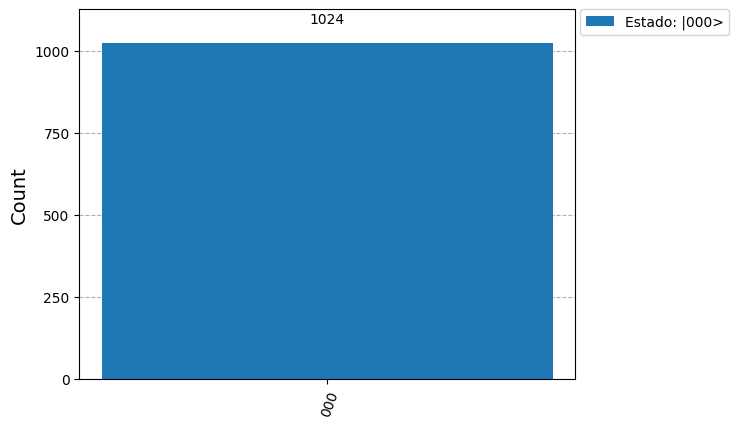

In [181]:
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram

sampler = StatevectorSampler()          # crear objeto de tipo StatevectorSampler
job_sampler = sampler.run([circuit0])   # ejecutar el circuito usando StatevectorSampler
job_sampler.result()                    # obtener las cuasi-probabilidades
plot_histogram([job_sampler.result()[0].data.c.get_counts()], legend=["Estado: |000>"])

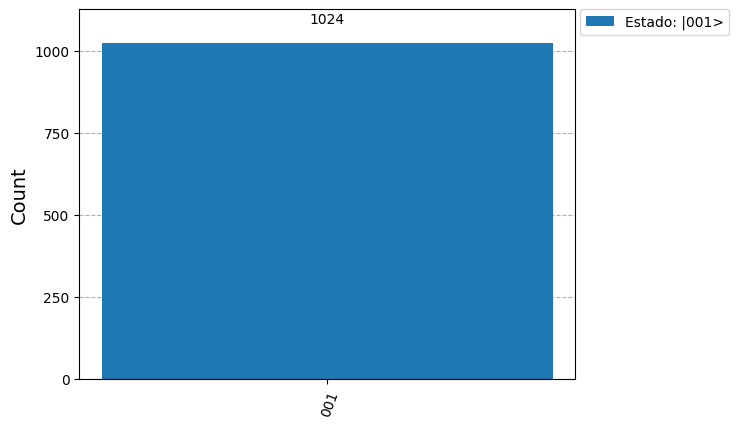

In [182]:
job_sampler = sampler.run([circuit1])   # ejecutar el circuito usando StatevectorSampler
job_sampler.result()                    # obtener las cuasi-probabilidades
plot_histogram([job_sampler.result()[0].data.c.get_counts()], legend=["Estado: |001>"])

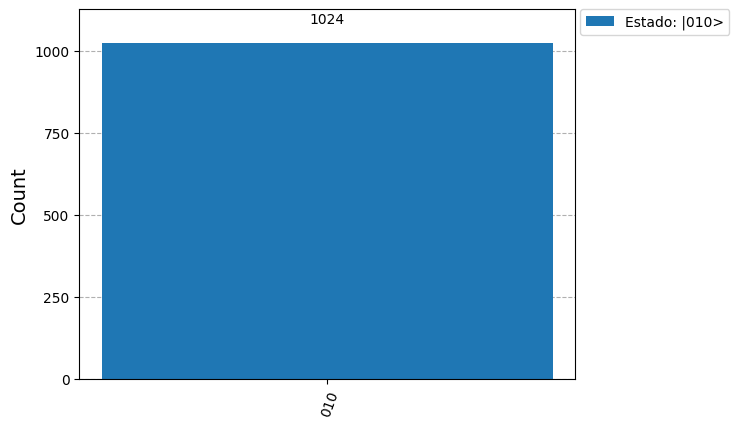

In [183]:
job_sampler = sampler.run([circuit2])   # ejecutar el circuito usando StatevectorSampler
job_sampler.result()                    # obtener las cuasi-probabilidades
plot_histogram([job_sampler.result()[0].data.c.get_counts()], legend=["Estado: |010>"])

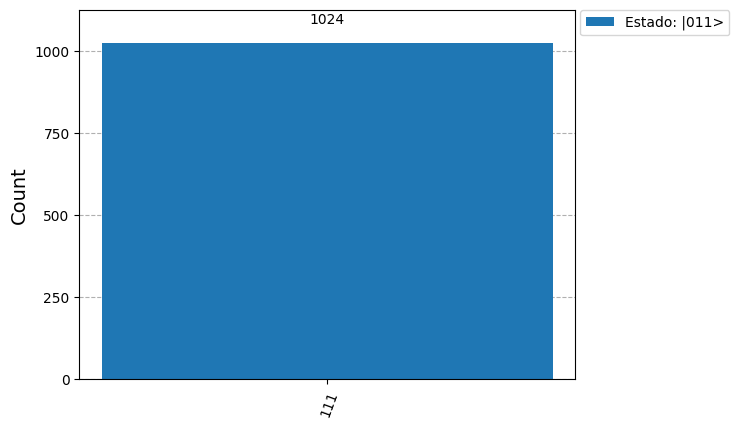

In [184]:
job_sampler = sampler.run([circuit3])   # ejecutar el circuito usando StatevectorSampler
job_sampler.result()                    # obtener las cuasi-probabilidades
plot_histogram([job_sampler.result()[0].data.c.get_counts()], legend=["Estado: |011>"])

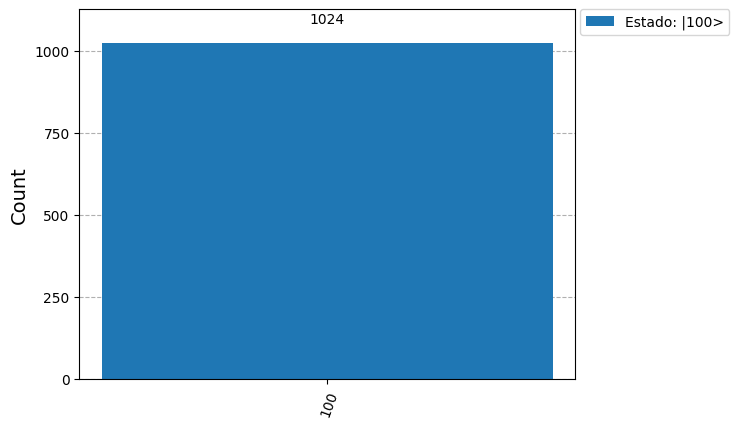

In [185]:
job_sampler = sampler.run([circuit4])   # ejecutar el circuito usando StatevectorSampler
job_sampler.result()                    # obtener las cuasi-probabilidades
plot_histogram([job_sampler.result()[0].data.c.get_counts()], legend=["Estado: |100>"])

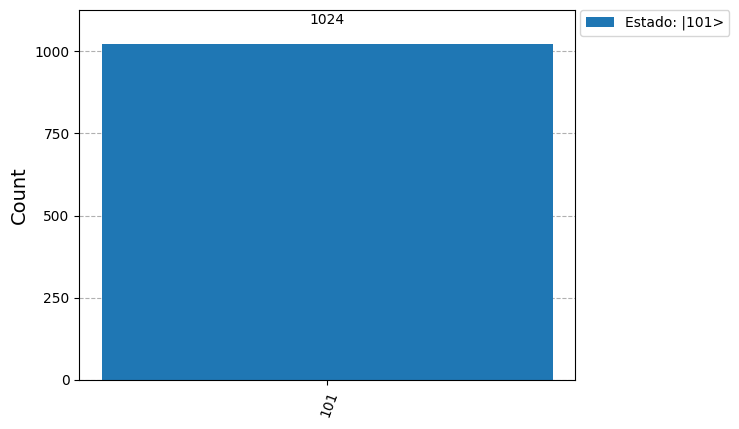

In [186]:
job_sampler = sampler.run([circuit5])   # ejecutar el circuito usando StatevectorSampler
job_sampler.result()                    # obtener las cuasi-probabilidades
plot_histogram([job_sampler.result()[0].data.c.get_counts()], legend=["Estado: |101>"])

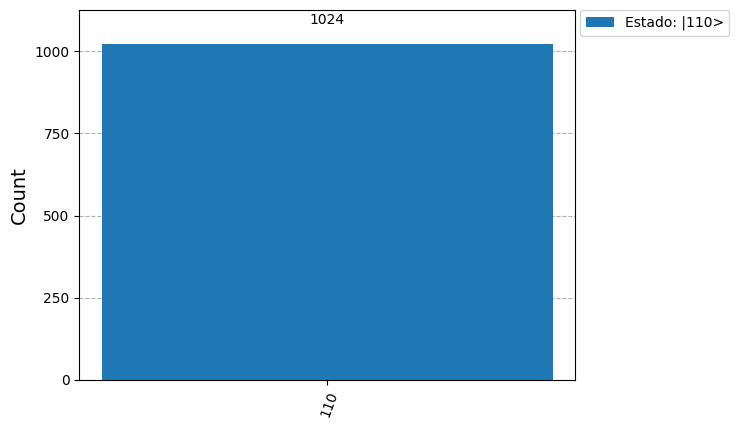

In [187]:
job_sampler = sampler.run([circuit6])   # ejecutar el circuito usando StatevectorSampler
job_sampler.result()                    # obtener las cuasi-probabilidades
plot_histogram([job_sampler.result()[0].data.c.get_counts()], legend=["Estado: |110>"])

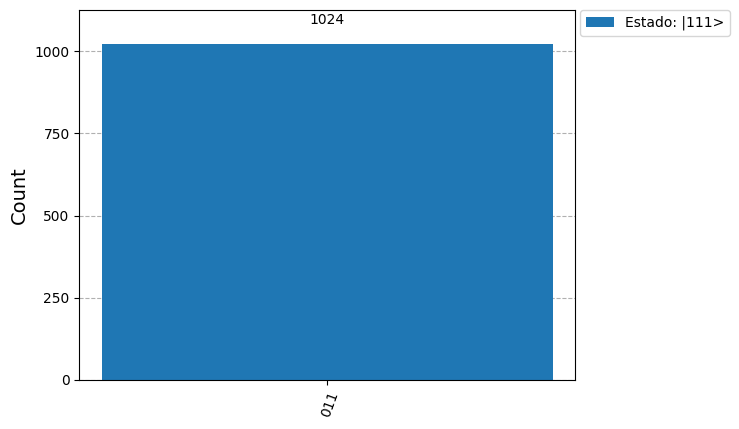

In [188]:
job_sampler = sampler.run([circuit7])   # ejecutar el circuito usando StatevectorSampler
job_sampler.result()                    # obtener las cuasi-probabilidades
plot_histogram([job_sampler.result()[0].data.c.get_counts()], legend=["Estado: |111>"])

- ##### Rellena toda la tabla (en markdown) con los resultados que obtengas de la medición al iniciar el circuito con cada estado posible.

|q2|q1|q0|$\rightarrow$|q2|q1|q0|
|:----:|:----:|:----:|:----:|:----:|:----:|:----:|
|0|0|0|$\rightarrow$|0|0|0|
|0|0|1|$\rightarrow$|0|0|1|
|0|1|0|$\rightarrow$|0|1|0|
|0|1|1|$\rightarrow$|1|1|1|
|1|0|0|$\rightarrow$|1|0|0|
|1|0|1|$\rightarrow$|1|0|1|
|1|1|0|$\rightarrow$|1|1|0|
|1|1|1|$\rightarrow$|0|1|1|

- ##### ¿Qué crees que hace este circuito?

Por las mediciones obtenidas observo que los qubits q0 y q1 son los cubits control, cuando ambos tienen el valor de 1 cambian el valor de q2, si este está en 0 lo cambia a 1 y viceversa.

### 2. Implementa la compuerta SWAP pero utilizando su equivalencia de tres compuertas de 2 qubits (tercer diagrama en esta referencia) en código de spinqit.

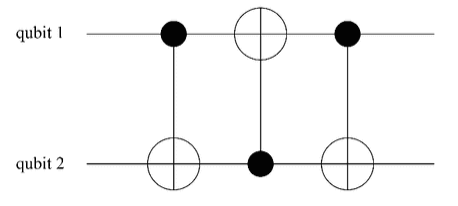

- ##### Escribe el código en spinqit como los ejemplos anteriores.

In [4]:
from spinqit import get_basic_simulator, get_compiler, BasicSimulatorConfig
from spinqit import Circuit, H, CX, Rx, draw
from spinqit.utils import print_circuit
from spinqit import get_nmr, get_compiler, NMRConfig

circ_swap = Circuit()
q = circ_swap.allocateQubits(2)   #2 qubits
circ_swap << (CX, (q[0], q[1]))
circ_swap << (CX, (q[1], q[0]))
circ_swap << (CX, (q[0], q[1]))

print(print_circuit(circ_swap))
print()

[Instruction(gate:CX, qubits:[0, 1], clbits:[], params:[]), Instruction(gate:CX, qubits:[1, 0], clbits:[], params:[]), Instruction(gate:CX, qubits:[0, 1], clbits:[], params:[])]



- ##### Realiza la simulación en tu computadora usando BasicSimulatorConfig (como en los ejemplos)

{'00': 1024}
{'00': 1.0}
[(1+0j), 0j, 0j, 0j]



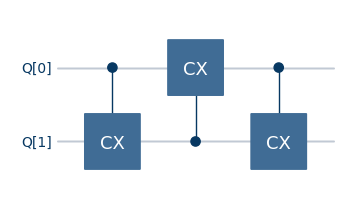

In [10]:
comp = get_compiler()
engine = get_basic_simulator()

exe = comp.compile(circ_swap, 0)
draw(exe)

config = BasicSimulatorConfig()
config.configure_shots(1024)
result = engine.execute(exe, config)

print(result.counts)
print(result.probabilities)
print(result.states)
print()

### 3. [Opcional] Implementa el siguiente circuito cuántico con Qiskit y simúlalo. ¿Qué crees que hace este circuito?

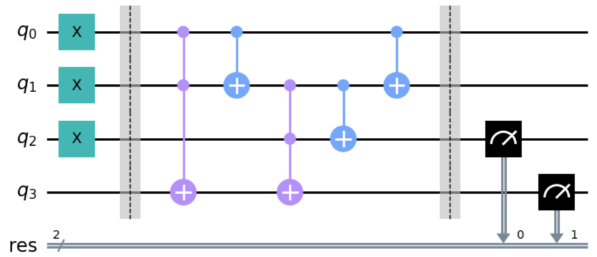

- ##### Las barreras (líneas verticales grises) se agregan con circuito.barrier().
- ##### Implementa el circuito usando Qiskit.
- ##### Las compuertas X antes de la primer barrera son un ejemplo de inicialización del estado, en este caso se está iniciando en |001> (recuerda el orden de Qiskit).

In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
from qiskit.visualization import plot_bloch_multivector

circ_3 = QuantumCircuit(4, 4)     # circuito con 4 qubits y 4 bits clásicos

circ_3.x(0)                       # aplicar compuerta X al q0
circ_3.x(1)                       # aplicar compuerta X al q1
circ_3.x(2)                       # aplicar compuerta X al q2
psi=Statevector.from_instruction(circ_3)
circ_3.barrier()
circ_3.ccx(0,1,3)                 # aplicar compuerta CCX al q0,q1,q3
circ_3.cx(0,1)                    # aplicar compuerta CX al q0,q1,q3
circ_3.ccx(1,2,3)                 # aplicar compuerta CCX al q1,q2,q3
circ_3.cx(1,2)                    # aplicar compuerta CX al q1,q2
circ_3.cx(0,1)                    # aplicar compuerta CX al q0,q1
circ_3.barrier()
psif=Statevector.from_instruction(circ_3)
circ_3.measure([2,3], [0,1])  # medir los 4 qubits en los 4 bits clásicos

print('Circuito con estado |0111>')
circ_3.draw('mpl')                # mostrar el circuito

ModuleNotFoundError: No module named 'qiskit'

In [118]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex

estado_in = psi.to_dict()
print("Estado cuántico inicial:")
for estado, amplitud in estado_in.items():
    if abs(amplitud) > 1e-10:  # Filtra amplitudes cercanas a cero
        print(f"{amplitud} |{estado}⟩")

estado_fin = psif.to_dict()
print("Estado cuántico final:")
for estado, amplitud in estado_fin.items():
    if abs(amplitud) > 1e-10:  # Filtra amplitudes cercanas a cero
        print(f"{amplitud} |{estado}⟩")

Estado cuántico inicial:
(1+0j) |0111⟩
Estado cuántico final:
(1+0j) |1111⟩


- ##### Recuerda simular el circuito con los diferentes estados iniciales posibles, como en los ejemplos de este notebook

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
from qiskit.visualization import plot_bloch_multivector

def op(QuantumCircuit):
    circuit_op=QuantumCircuit
    psi=Statevector.from_instruction(circuit_op)
    estado_in = psi.to_dict()
    print("Estado cuántico inicial:")
    for estado, amplitud in estado_in.items():
        if abs(amplitud) > 1e-10:  # Filtra amplitudes cercanas a cero
            print(f"{amplitud} |{estado}⟩")
    
    circuit_op.ccx(0,1,3)                 # aplicar compuerta CCX al q0,q1,q3
    circuit_op.cx(0,1)                    # aplicar compuerta CX al q0,q1,q3
    circuit_op.ccx(1,2,3)                 # aplicar compuerta CCX al q1,q2,q3
    circuit_op.cx(1,2)                    # aplicar compuerta CX al q1,q2
    circuit_op.cx(0,1)                    # aplicar compuerta CX al q0,q1
    circuit_op.barrier()
    psif=Statevector.from_instruction(circuit_op)
    circuit_op.measure([2,3], [0,1])  # medir los 4 qubits en los 4 bits clásicos
    
    circuit_op.draw('mpl')                # mostrar el circuito

    estado_fin = psif.to_dict()
    print("Estado cuántico final:")
    for estado, amplitud in estado_fin.items():
        if abs(amplitud) > 1e-10:  # Filtra amplitudes cercanas a cero
            print(f"{amplitud} |{estado}⟩")
    return circuit_op

ModuleNotFoundError: No module named 'qiskit'

Estado cuántico inicial:
(1+0j) |0000⟩
Estado cuántico final:
(1+0j) |0000⟩


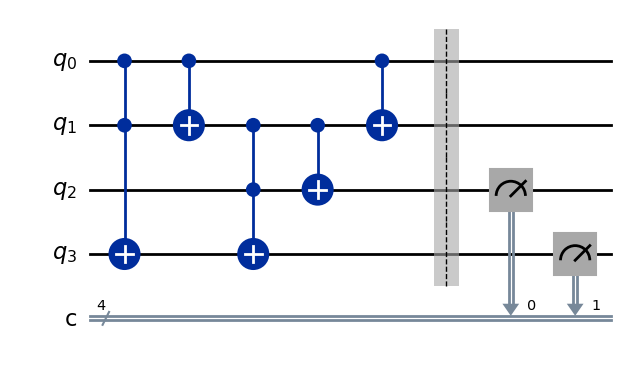

In [120]:
circuit0 = QuantumCircuit(4,4) # estado |0000>
op(circuit0)
circuit0.draw('mpl')  

Estado cuántico inicial:
(1+0j) |0001⟩
Estado cuántico final:
(1+0j) |0101⟩


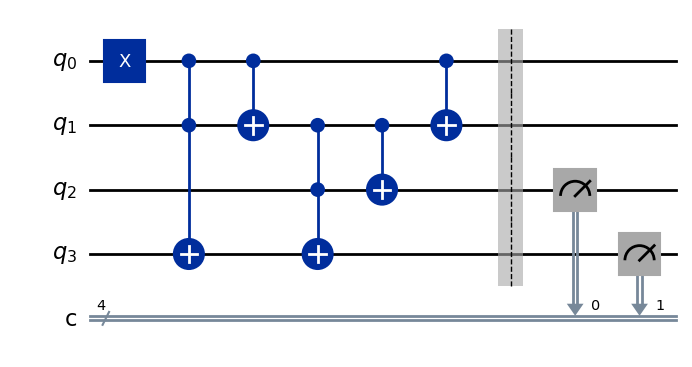

In [121]:
circuit1 = QuantumCircuit(4,4) # estado |0001>
circuit1.x(0)
op(circuit1)
circuit1.draw('mpl')  

Estado cuántico inicial:
(1+0j) |0010⟩
Estado cuántico final:
(1+0j) |0110⟩


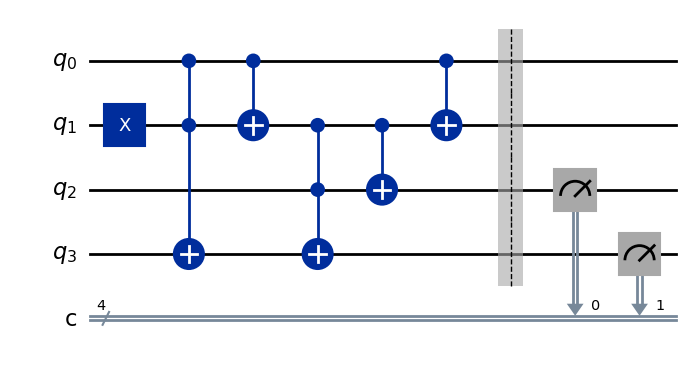

In [122]:
circuit2 = QuantumCircuit(4,4) # estado |0010>
circuit2.x(1)    # q1 = |1>
op(circuit2)
circuit2.draw('mpl')  

Estado cuántico inicial:
(1+0j) |0011⟩
Estado cuántico final:
(1+0j) |1011⟩


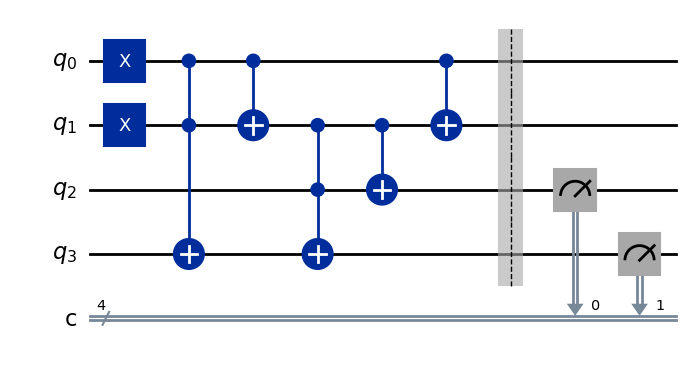

In [123]:
circuit3 = QuantumCircuit(4,4) # estado |0011>
circuit3.x(0)    # q0 = |1>
circuit3.x(1)    # q1 = |1>
op(circuit3)
circuit3.draw('mpl')

Estado cuántico inicial:
(1+0j) |0100⟩
Estado cuántico final:
(1+0j) |0100⟩


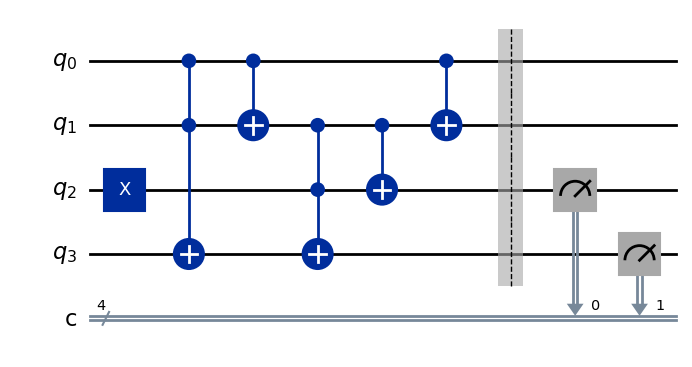

In [124]:
circuit4 = QuantumCircuit(4,4) # estado |0100>
circuit4.x(2)    # q2 = |1>
op(circuit4)
circuit4.draw('mpl')  

Estado cuántico inicial:
(1+0j) |0101⟩
Estado cuántico final:
(1+0j) |1001⟩


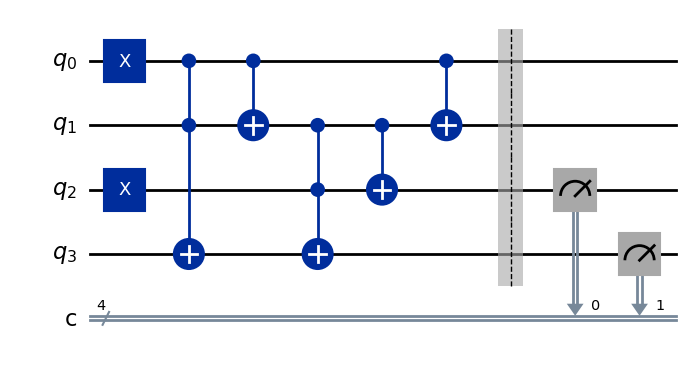

In [125]:
circuit5 = QuantumCircuit(4,4) # estado |0101>
circuit5.x(0)    # q0 = |1>
circuit5.x(2)    # q2 = |1>
op(circuit5)
circuit5.draw('mpl')

Estado cuántico inicial:
(1+0j) |0110⟩
Estado cuántico final:
(1+0j) |1010⟩


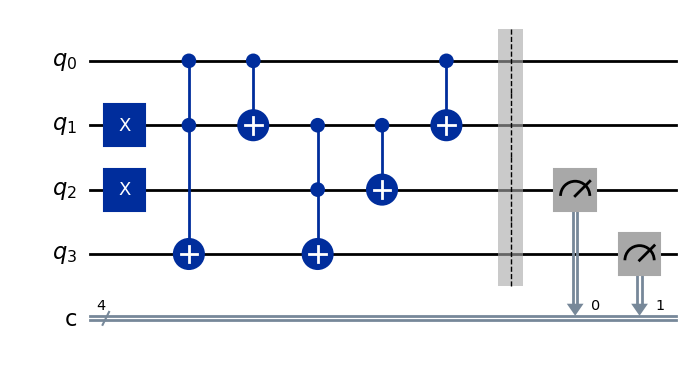

In [126]:
circuit6 = QuantumCircuit(4,4) # estado |0110>
circuit6.x(1)    # q1 = |1>
circuit6.x(2)    # q2 = |1>
op(circuit6)
circuit6.draw('mpl')

Estado cuántico inicial:
(1+0j) |0111⟩
Estado cuántico final:
(1+0j) |1111⟩


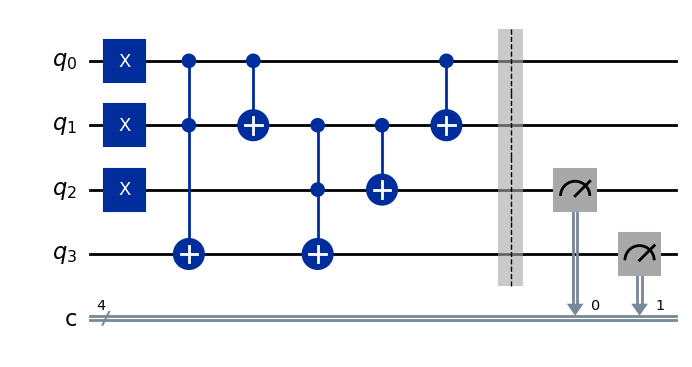

In [127]:
circuit7 = QuantumCircuit(4,4) # estado |0111>
circuit7.x(0)    # q0 = |1>
circuit7.x(1)    # q1 = |1>
circuit7.x(2)    # q2 = |1>
op(circuit7)
circuit7.draw('mpl')

Estado cuántico inicial:
(1+0j) |1000⟩
Estado cuántico final:
(1+0j) |1000⟩


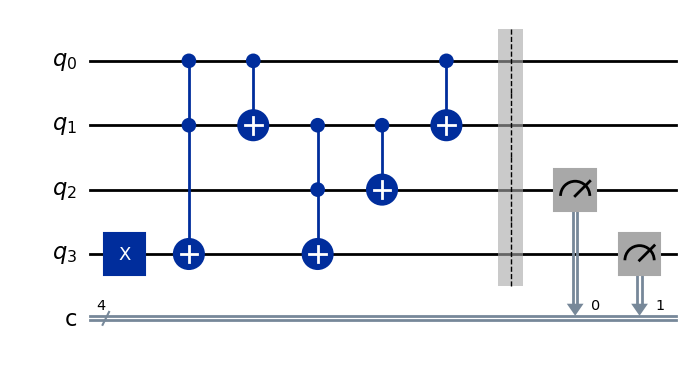

In [128]:
circuit8 = QuantumCircuit(4,4) # estado |1000>
circuit8.x(3)    # q3 = |1>
op(circuit8)
circuit8.draw('mpl')

Estado cuántico inicial:
(1+0j) |1001⟩
Estado cuántico final:
(1+0j) |1101⟩


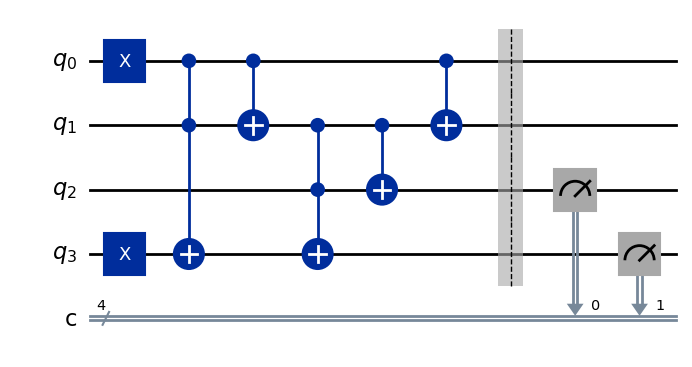

In [129]:
circuit9 = QuantumCircuit(4,4) # estado |1001>
circuit9.x(0)    # q0 = |1>
circuit9.x(3)    # q3 = |1>
op(circuit9)
circuit9.draw('mpl')

Estado cuántico inicial:
(1+0j) |1010⟩
Estado cuántico final:
(1+0j) |1110⟩


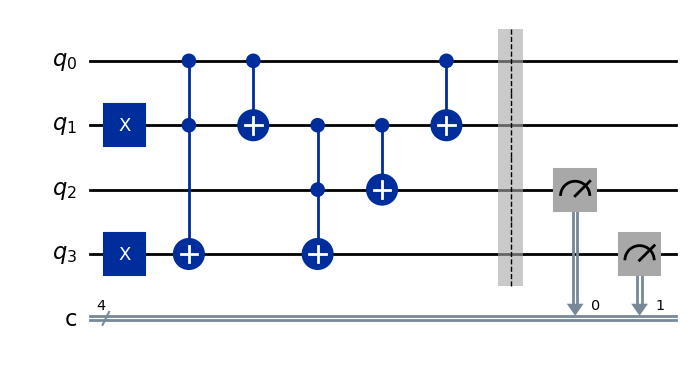

In [130]:
circuit10 = QuantumCircuit(4,4) # estado |1010>
circuit10.x(1)    # q1 = |1>
circuit10.x(3)    # q3 = |1>
op(circuit10)
circuit10.draw('mpl')

Estado cuántico inicial:
(1+0j) |1011⟩
Estado cuántico final:
(1+0j) |0011⟩


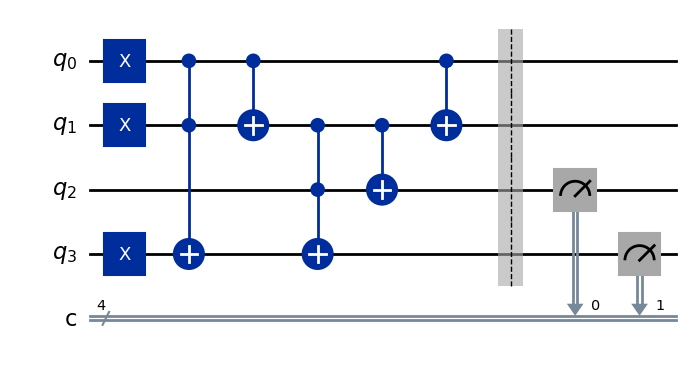

In [131]:
circuit11 = QuantumCircuit(4,4) # estado |1011>
circuit11.x(0)    # q0 = |1>
circuit11.x(1)    # q1 = |1>
circuit11.x(3)    # q3 = |1>
op(circuit11)
circuit11.draw('mpl')

Estado cuántico inicial:
(1+0j) |1100⟩
Estado cuántico final:
(1+0j) |1100⟩


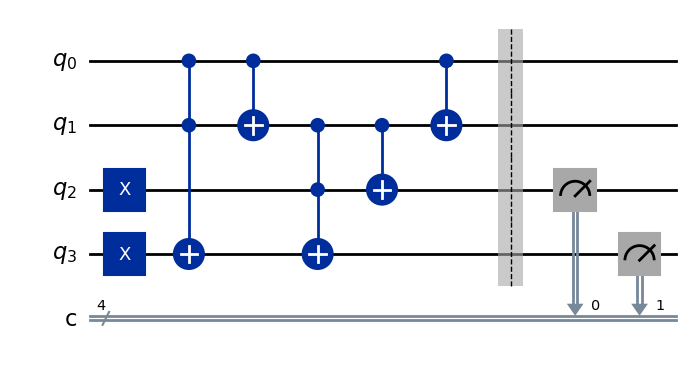

In [132]:
circuit12 = QuantumCircuit(4,4) # estado |1100>
circuit12.x(2)    # q2 = |1>
circuit12.x(3)    # q3 = |1>
op(circuit12)
circuit12.draw('mpl')

Estado cuántico inicial:
(1+0j) |1101⟩
Estado cuántico final:
(1+0j) |0001⟩


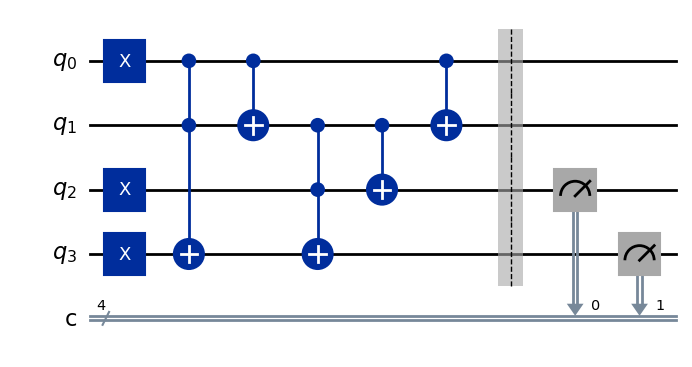

In [133]:
circuit13 = QuantumCircuit(4,4) # estado |1101>
circuit13.x(0)    # q0 = |1>
circuit13.x(2)    # q2 = |1>
circuit13.x(3)    # q3 = |1>
op(circuit13)
circuit13.draw('mpl')

Estado cuántico inicial:
(1+0j) |1110⟩
Estado cuántico final:
(1+0j) |0010⟩


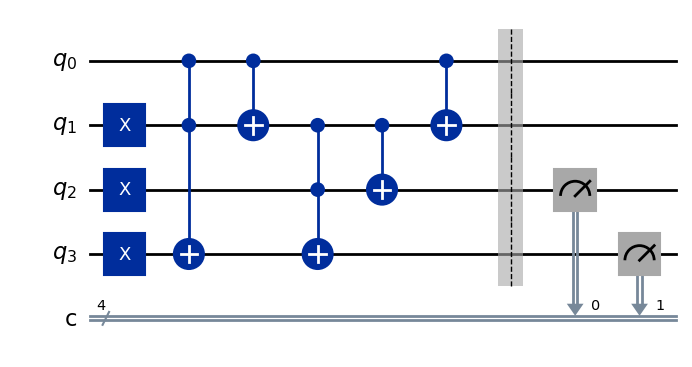

In [134]:
circuit14 = QuantumCircuit(4,4) # estado |1110>
circuit14.x(1)    # q1 = |1>
circuit14.x(2)    # q2 = |1>
circuit14.x(3)    # q3 = |1>
op(circuit14)
circuit14.draw('mpl')

Estado cuántico inicial:
(1+0j) |1111⟩
Estado cuántico final:
(1+0j) |0111⟩


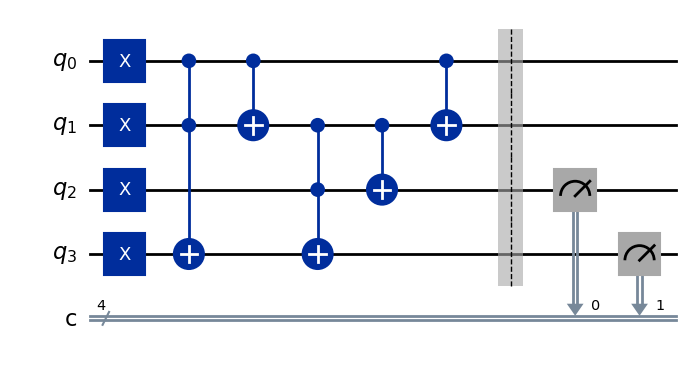

In [135]:
circuit15 = QuantumCircuit(4,4) # estado |1111>
circuit15.x(0)    # q0 = |1>
circuit15.x(1)    # q1 = |1>
circuit15.x(2)    # q2 = |1>
circuit15.x(3)    # q3 = |1>
op(circuit15)
circuit15.draw('mpl')

- ##### En una celda de markdown describe lo que crees que hace este circuito cuántico

##### Tabla de verdad:

|q3|q2|q1|q0|$\rightarrow$|q3|q2|q1|q0|
|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|
|0|0|0|0|$\rightarrow$|0|0|0|0|
|0|0|0|1|$\rightarrow$|0|1|0|1|
|0|0|1|0|$\rightarrow$|0|1|1|0|
|0|0|1|1|$\rightarrow$|1|0|1|1|
|0|1|0|0|$\rightarrow$|0|1|0|0|
|0|1|0|1|$\rightarrow$|1|0|0|1|
|0|1|1|0|$\rightarrow$|1|0|1|0|
|0|1|1|1|$\rightarrow$|1|1|1|1|
|1|0|0|0|$\rightarrow$|1|0|0|0|
|1|0|0|1|$\rightarrow$|1|1|0|1|
|1|0|1|0|$\rightarrow$|1|1|1|0|
|1|0|1|1|$\rightarrow$|0|0|1|1|
|1|1|0|0|$\rightarrow$|1|1|0|0|
|1|1|0|1|$\rightarrow$|0|0|0|1|
|1|1|1|0|$\rightarrow$|0|0|1|0|
|1|1|1|1|$\rightarrow$|0|1|1|1|

Por lo que observo con la tabla de verdad el circuito va cambiando los estados excepto en los que corresponden a decimal 0,4,8,12, no parece tener un qubit de control fijo, este va cambiando dado que no encuentro un patron en el cambio de estados.